In [27]:
import pandas as pd
import numpy as np

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 ## Variables in order:
   # CRIM     per capita crime rate by town
   # ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
   # INDUS    proportion of non-retail business acres per town
   # CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
   # NOX      nitric oxides concentration (parts per 10 million)
   # RM       average number of rooms per dwelling
   # AGE      proportion of owner-occupied units built prior to 1940
   # DIS      weighted distances to five Boston employment centres
   # RAD      index of accessibility to radial highways
   # TAX      full-value property-tax rate per $10,000
   # PTRATIO  pupil-teacher ratio by town
   # B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
   # LSTAT    % lower status of the population
   # EDV     Median value of owner-occupied homes in $1000's

In [28]:
raw_df = pd.read_csv("http://lib.stat.cmu.edu/datasets/boston", sep = "\s+", skiprows=22, header=None)
# raw_df
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [29]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [ ]:
target = raw_df.values[1::2, 2]
target

In [31]:
df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['TARGET'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [63]:
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

## 요약통계
1. chas에 따른 집가격(target)위 평균, 표준편차, 중앙값을 구하라.
2. CHAS(찰스강 경계)따른 집값에 대한  t테스트 수행
3. 선형회귀분석을 모델을 생성하고 모델을 사용하여 예측값을 구하라.
4. 새로운 데이터 2개를 사용하여 예측값을 구하라.
5. 부분회귀분석 시각화를 작성하여 독립변수들이 종속변수에 미치는 영향을 분석하라. 
 - 1개독립변수 분석(plot_partregress)은 (CRIM)으로한다.
 - plot_partregress_grid() 작성

In [80]:
# 1.
print(df.groupby(by='CHAS')['TARGET'].agg(['mean', 'std', 'median']))

# 2.
print(stats.ttest_ind(df['CHAS'], df['TARGET']))

# 3.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# fitted_model = model.fit(df[df.columns[:13]], df[df.columns[13:]])
model.fit(df[df.columns[:13]], df[df.columns[13:]])
df_predict = model.predict(df[df.columns[0:13]])
# print(df[df.columns[13:]])
print(df_predict)

           mean        std  median
CHAS                              
0.0   22.093843   8.831362    20.9
1.0   28.440000  11.816643    23.3
Ttest_indResult(statistic=-54.9210289745203, pvalue=1.4651540072350996e-305)
[[30.00384338]
 [25.02556238]
 [30.56759672]
 [28.60703649]
 [27.94352423]
 [25.25628446]
 [23.00180827]
 [19.53598843]
 [11.52363685]
 [18.92026211]
 [18.99949651]
 [21.58679568]
 [20.90652153]
 [19.55290281]
 [19.28348205]
 [19.29748321]
 [20.52750979]
 [16.91140135]
 [16.17801106]
 [18.40613603]
 [12.52385753]
 [17.67103669]
 [15.83288129]
 [13.80628535]
 [15.67833832]
 [13.38668561]
 [15.46397655]
 [14.70847428]
 [19.54737285]
 [20.8764282 ]
 [11.45511759]
 [18.05923295]
 [ 8.81105736]
 [14.28275814]
 [13.70675891]
 [23.81463526]
 [22.34193708]
 [23.10891142]
 [22.91502612]
 [31.35762569]
 [34.21510225]
 [28.02056414]
 [25.20386628]
 [24.60979273]
 [22.94149176]
 [22.09669817]
 [20.42320032]
 [18.03655088]
 [ 9.10655377]
 [17.20607751]
 [21.28152535]
 [23.97222285]
 [2

[[28.9116431 ]
 [26.60313216]]


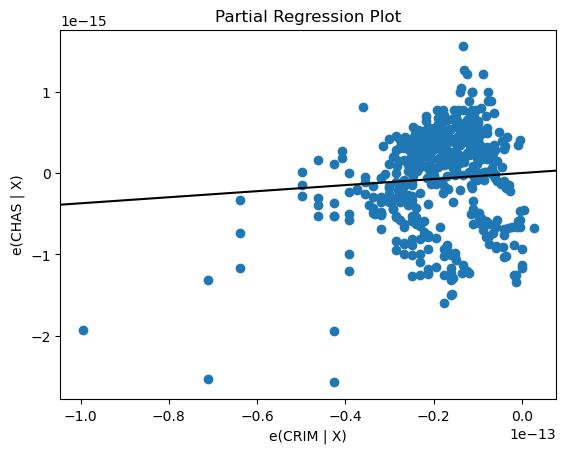

In [68]:

# 4.
sampledata2 = {
    'CRIM' : [0.00741, 0.02697], 
    'ZN' : [15.0, 0.0], 
    'INDUS' : [6.72, 2.04], 
    'CHAS' : [1, 0], 
    'NOX' : [0.547, 0.433], 
    'RM' : [6.321, 7.081], 
    'AGE' : [70.4, 54.7], 
    'DIS' : [5.1599, 6.1557], 
    'RAD' : [3.0, 2.0], 
    'TAX' : [243.0, 271.0], 
    'PTRATIO' : [16.9, 17.4], 
    'B' : [396.6, 389.7], 
    'LSTAT' : [6.44, 8.49]
}

df2 = pd.DataFrame(sampledata2, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df_predict2 = model.predict(df2)
print(df_predict2)

## CHAS vs CRIM의 관계 plot_partregress에서는 나머지 독립변수들을 지정해주어야함 ##
# 5.
others = list(set(df.columns).difference(set['CHAS', 'CRAM']))
p, residuce = sm.graphics.plot_partregress('CHAS', 'CRIM', others, data = df, ret_coords = True, obs_labels = False)
plt.show()


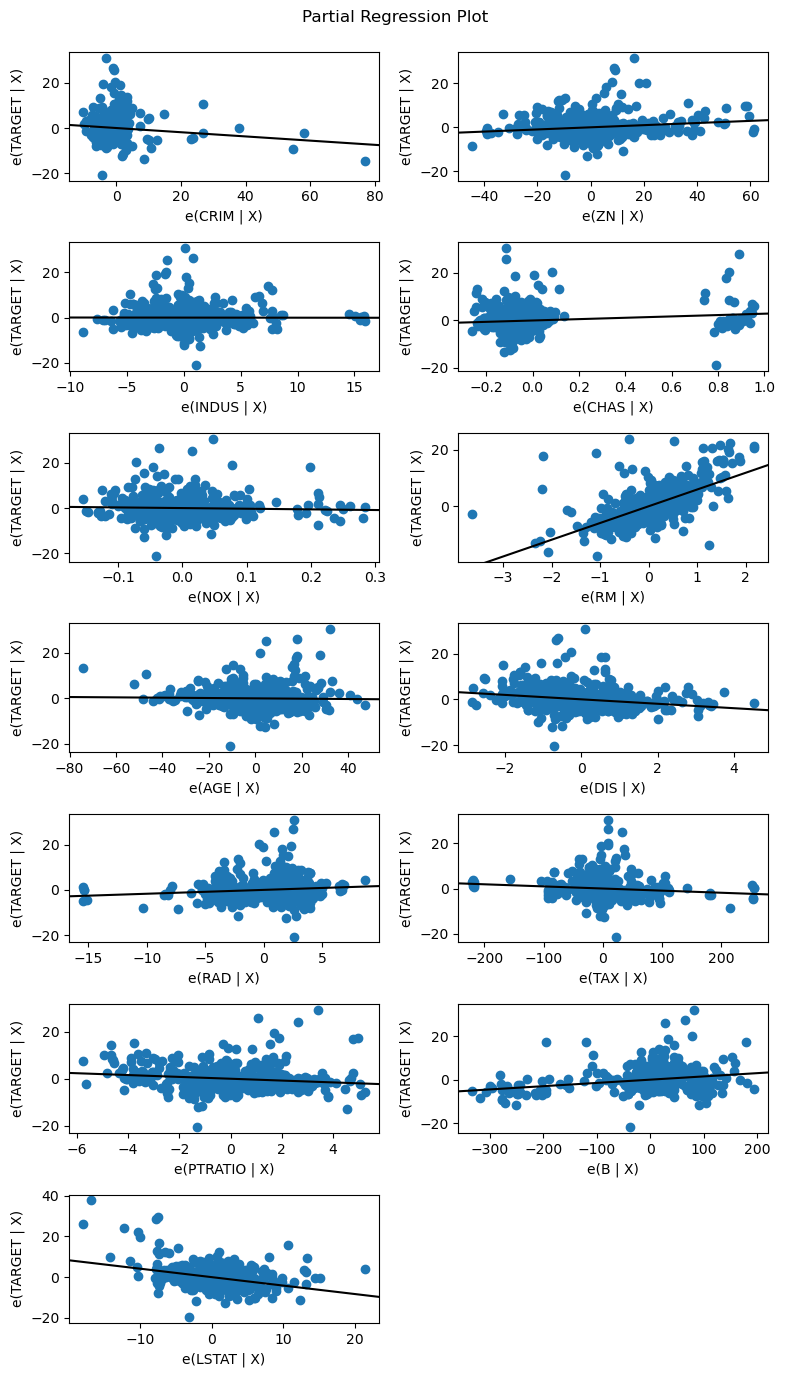

In [90]:
## CHAS vs CRIM의 관계 plot_partregress_grid에서는 나머지 독립변수들을 지정해주어야함 ##
## 각 others의 요소에 대한 CHAS vs CRIM의 관계를 나타냄 ##
# 6.
fig = plt.figure(figsize = (8, 14))
fitted_model = sm.OLS(df[df.columns[13:]], df[df.columns[:13]])
result = fitted_model.fit()
# print(result.summary())
sm.graphics.plot_partregress_grid(result, fig = fig)
# LinearRegression으로 하면 Seaborn으로 새로그려야함 ##
# sm.OLS를 사용하면 바로 쓸 수 있음 #
# sm.graphics.plot_partregress_grid(fitted_model, fig = fig)
plt.show()